# G010.62 B3 looked better before I re-ran it.  Why?

In [60]:
noisedir = "/orange/adamginsburg/ALMA_IMF/reduction/reduction/noise_estimation_regions/"

In [61]:
from spectral_cube import SpectralCube

In [62]:
import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)
warnings.simplefilter('ignore', spectral_cube.utils.PossiblySlowWarning)
warnings.simplefilter('ignore', spectral_cube.utils.WCSWarning)

In [63]:
%matplotlib inline
import numpy as np
from astropy import units as u
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)
pl.style.use('dark_background')
pl.rcParams['image.origin'] = 'lower'
import sys
import glob
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/reduction/')
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import spectral_cube
from astropy.visualization import simple_norm
import regions

In [64]:
def compare_withamp_withoutamp(withamp, withoutamp, noisereg, zoom=slice(None), max_percent=99.9, min_percent=None, stretch='asinh',
                               noise_threshold=3, shrink=0.85, cmap='viridis',
                               label1="No amp selfcal",
                               label2="With amp selfcal",
                               difflabel="No amp - With amp",
                              ):

    noamp = SpectralCube.read(withoutamp, format='casa_image' if 'fits' not in withoutamp else 'fits')
    withamp = SpectralCube.read(withamp, format='casa_image' if 'fits' not in withoutamp else 'fits')
    
    reg = regions.read_ds9(noisereg)
    
    noise_noamp = noamp.subcube_from_regions(reg).mad_std()
    noise_withamp = withamp.subcube_from_regions(reg).mad_std()
    print(f"Noise w/o: {noise_noamp:0.6g}")
    print(f"Noise with: {noise_withamp:0.6g}")
    print(f"Fractional difference: {(noise_noamp-noise_withamp)/noise_noamp}")
    
    mask = (noamp > noise_noamp*noise_threshold) & (withamp > noise_withamp*noise_threshold)
    ratio = (noamp/withamp).with_mask(mask)
    print(f"Flux ratio (no amp / with amp) 25%: {ratio.percentile(25)}  50%: {ratio.median()}  75%: {ratio.percentile(75)}")
    
    fig,((ax1,ax2),(ax3,ax4)) = pl.subplots(2,2, figsize=(12,12))
    norm = simple_norm(noamp[0].value[zoom], max_percent=max_percent, min_percent=min_percent, stretch=stretch)
    im = ax1.imshow(noamp[0].value[zoom], norm=norm, cmap=cmap)
    fig.colorbar(mappable=im, ax=ax1, shrink=shrink)
    ax1.set_title(label1)
    im = ax2.imshow(withamp[0].value[zoom], norm=norm, cmap=cmap)
    fig.colorbar(mappable=im, ax=ax2, shrink=shrink)
    ax2.set_title(label2)
    diff = (noamp[0].value-withamp[0].value)[zoom]
    im = ax3.imshow(diff, norm=simple_norm(diff, min_percent=1, max_percent=99, stretch='asinh'), cmap=cmap)
    fig.colorbar(mappable=im, ax=ax3, shrink=shrink)
    ax3.set_title(difflabel)
    im = ax4.imshow(diff, cmap=cmap)
    ax4.set_title(difflabel)
    fig.colorbar(mappable=im, ax=ax4, shrink=shrink)
    for ax in (ax1,ax2,ax3,ax4):
        ax.set_xticks([])
        ax.set_yticks([])
    pl.subplots_adjust(hspace=0.05, wspace=0.05)
    
    return noamp, withamp, ratio

In [65]:
reldir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/"

In [66]:
rstimresdir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults"
decdir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/December2020Release/"

In [67]:
imdir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/"

Noise w/o: 6.09291e-05 Jy / beam
Noise with: 7.04373e-05 Jy / beam
Fractional difference: -0.15605290180942594
Flux ratio (no amp / with amp) 25%: 0.8888779580593109  50%: 0.997178316116333  75%: 1.075925201177597


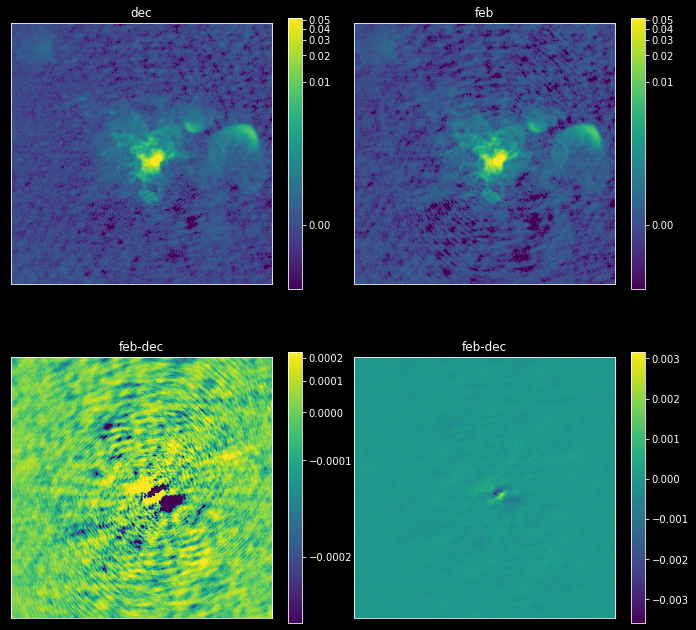

In [68]:
_=compare_withamp_withoutamp(withamp=f'{reldir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal8_finaliter.image.tt0.fits',
                             withoutamp=f'{decdir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.fits',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             label1="dec",
                             label2="feb",
                             difflabel='feb-dec',
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

Noise w/o: 6.09291e-05 Jy / beam
Noise with: 5.94815e-05 Jy / beam
Fractional difference: 0.023758276973195092
Flux ratio (no amp / with amp) 25%: 0.9629685580730438  50%: 1.0023736953735352  75%: 1.05826798081398


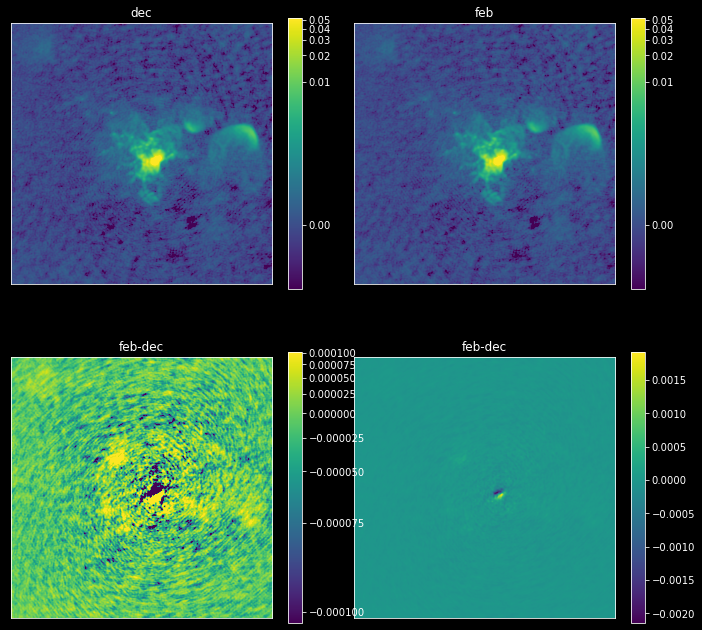

In [69]:
_=compare_withamp_withoutamp(withamp=f'{rstimresdir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.fits',
                             withoutamp=f'{decdir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.fits',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             label1="dec",
                             label2="feb",
                             difflabel='feb-dec',
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

Noise w/o: 9.46582e-05 Jy / beam
Noise with: 6.00491e-05 Jy / beam
Fractional difference: 0.365621400253723
Flux ratio (no amp / with amp) 25%: 0.9468367546796799  50%: 1.0082359313964844  75%: 1.1640160381793976


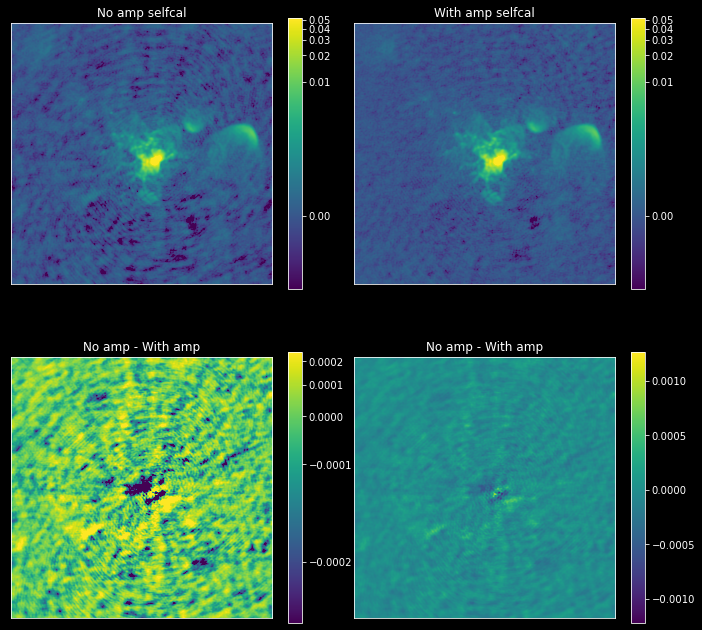

In [70]:
_=compare_withamp_withoutamp(withamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal8.image.tt0.fits',
                             withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.image.tt0.fits',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

Noise w/o: 8.99767e-05
Noise with: 5.85335e-05
Fractional difference: 0.34945960263138026


/home/adamginsburg/.local/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Flux ratio (no amp / with amp) 25%: 1.2570234835147858  50%: 1.4651703834533691  75%: 1.6526999175548553


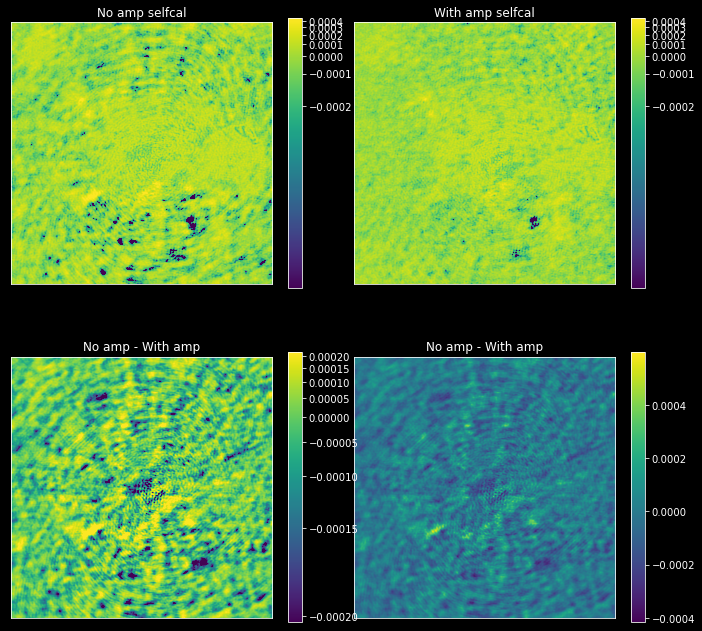

In [71]:
_=compare_withamp_withoutamp(withamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal8.residual.tt0',
                             withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.residual.tt0',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

Noise w/o: 8.99767e-05
Noise with: 5.85335e-05
Fractional difference: 0.34945960263138026


/home/adamginsburg/.local/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Flux ratio (no amp / with amp) 25%: 1.2570234835147858  50%: 1.4651703834533691  75%: 1.6526999175548553


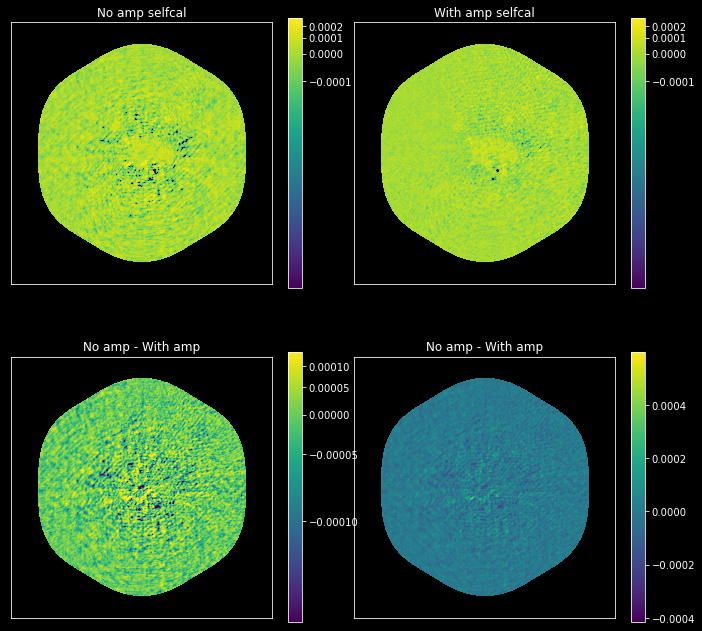

In [72]:
_=compare_withamp_withoutamp(withamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal8.residual.tt0',
                             withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.residual.tt0',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             #zoom=(slice(1000,-1000), slice(1000,-1000)),
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

Noise w/o: 6.09291e-05 Jy / beam
Noise with: 5.94815e-05 Jy / beam
Fractional difference: 0.023758276973195092
Flux ratio (no amp / with amp) 25%: 0.9629685580730438  50%: 1.0023736953735352  75%: 1.05826798081398


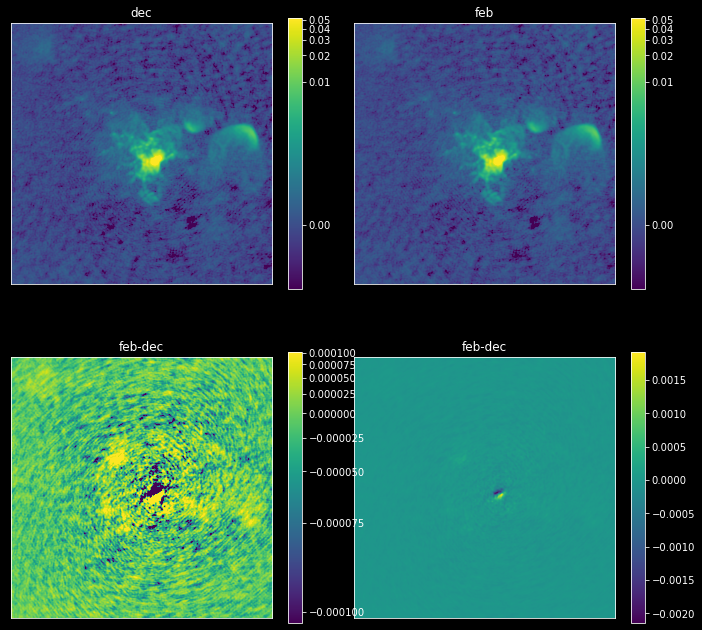

In [73]:
_=compare_withamp_withoutamp(withamp=f'{rstimresdir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.fits',
                             withoutamp=f'{decdir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.fits',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             label1="dec",
                             label2="feb",
                             difflabel='feb-dec',
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

Noise w/o: 8.99767e-05
Noise with: 5.80021e-05
Fractional difference: 0.35536552780497127


/home/adamginsburg/.local/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Flux ratio (no amp / with amp) 25%: 1.2684340178966522  50%: 1.483203411102295  75%: 1.6592468917369843


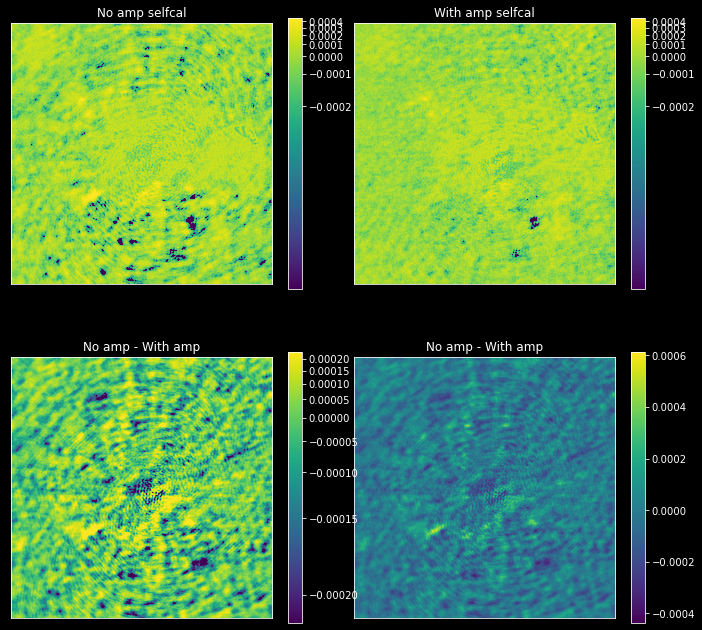

In [74]:
_=compare_withamp_withoutamp(withamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal9.residual.tt0',
                             withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.residual.tt0',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)